
* SOM 은 우선 Map size 를 설정해줍니다. (* 군집분석으로 SOM을 사용할 때에는 군집의 수를 차원의 수로 맞추어 주어야 합니다. )
<br><br>
* 이제 이 Default Map 을 조금씩 수정해서(학습해서 = fit) 데이터 분포 형태에 Map 을 근사시킵니다. 
<br><br>
 
 ![image-2.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

### 예제 : iris_data를 som으로 군집분석 해보세요.

In [2]:
# 데이터 로드
import pandas as pd
import numpy as np
iris = pd.read_csv('./data/iris.csv')
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
y = iris['target']
X = iris.drop('target', axis = 1)

In [5]:
# 특성 스케일링
# SOM 이상치에 민감하기 때문에 스케일링이 필요
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

In [6]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [8]:
!pip install sklearn_som

In [10]:
# sklearn의 모든 분류기와 마찬가지로 SOM 인스턴스를 빌드하고 SOM.fit()에 맞게 데이터 호출
# iris 데이터셋에 3개의 클래스가 있다는 것을 이미 알고 있으므로 
# 자체 구성 맵에 3 x 1 구조를 사용하지만 실제로는 데이터에 가장 적합한 것을 찾기 위해 다른 구조를 시도해 봐야함

from sklearn_som.som import SOM

In [11]:
# dim : 변수의 개수
iris_som = SOM(m=3, n=1, dim=4)
iris_som.fit(X)

In [12]:
predictions = iris_som.predict(X)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
iris['cluster'] = predictions

In [16]:
iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


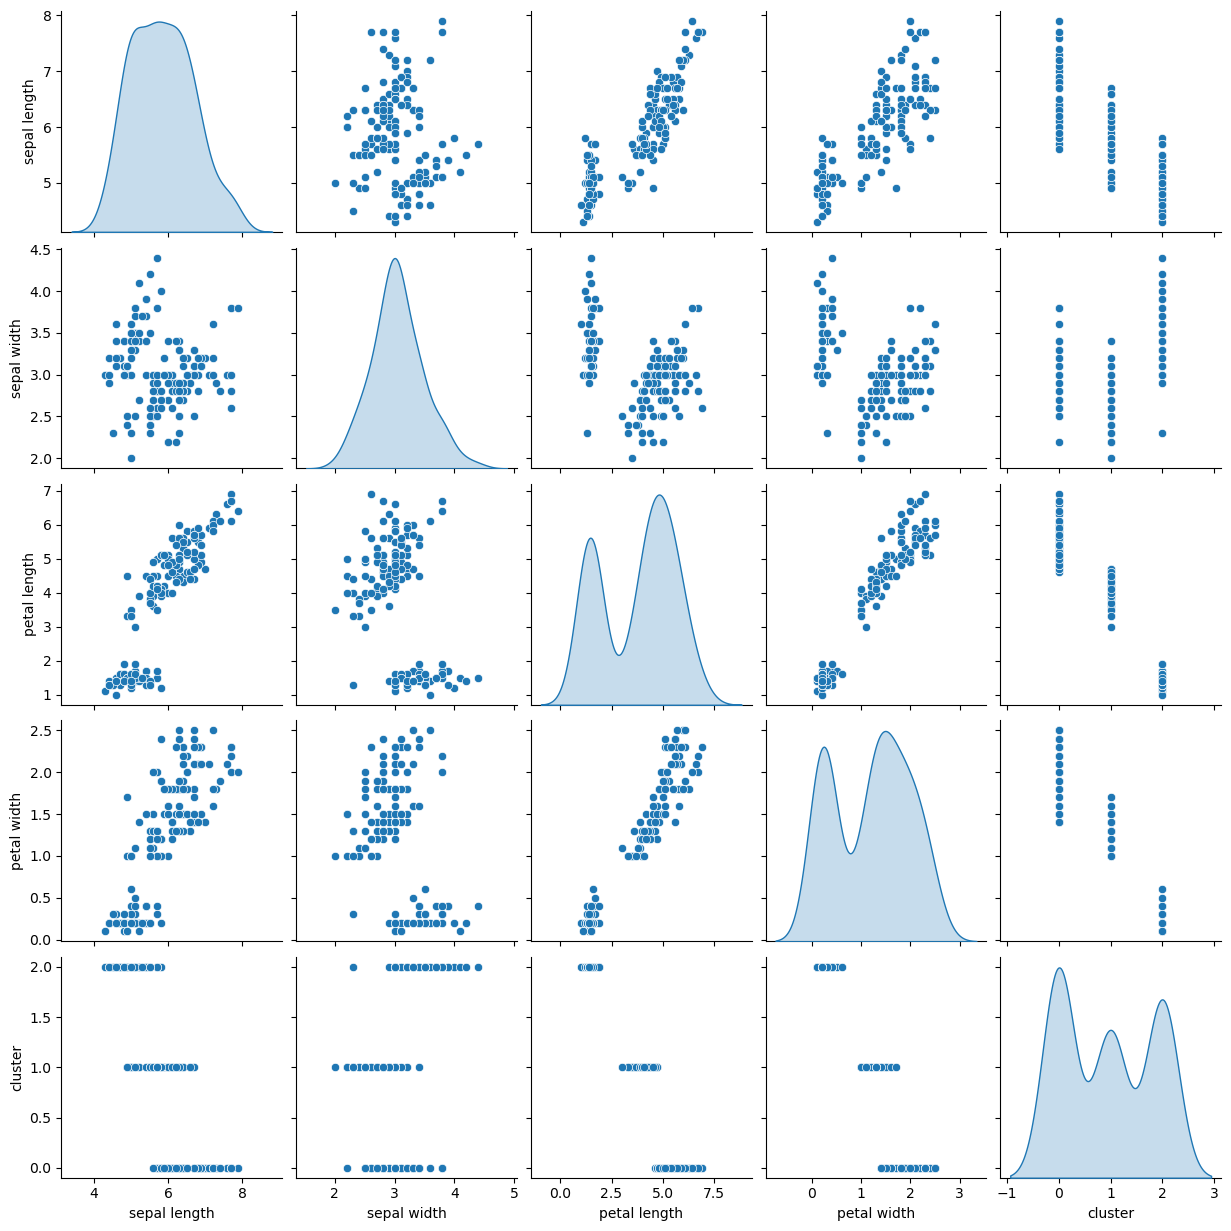

In [19]:
# 원본 traget으로 시각화
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(iris, diag_kind='kde', hue='cluster', palette='bright')
plt.show()